In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/data/keeling/a/alfonso8/projects/simles_proj/data/US_MaizeYield_Predictors_1950-2013.csv')
df.index = pd.to_datetime(df.year, format='%Y')
df['state'] = df['state'].astype(int)
df_states =  pd.read_csv('/data/keeling/a/alfonso8/projects/simles_proj/data/states.csv', header=0, 
                         names=['name', 'zip', 'state'])
df_counties =  pd.read_csv('/data/keeling/a/alfonso8/projects/simles_proj/data/counties.csv', header=0, 
                         names=['fips', 'county_name'])
st_dict = { int(row['state']): row['zip'] for index, row in df_states.iterrows()}
df['postal_code'] = df['state'].map(st_dict)

In [3]:
df.set_index(['fips', 'year'], inplace=True)

In [4]:
df.head()

yield  state     area     EDD_4       GDD_4      prcp_4  \
fips year                                                              
1033 2013.0  182.2      1  25500.0  0.144660  182.989896  138.405888   
     2012.0  102.4      1  24500.0  0.444557  226.509776   39.489620   
     2011.0  131.3      1  19500.0  0.952782  244.578863  326.529743   
     2010.0  142.8      1  20800.0  0.217440  224.846848   64.150614   
     2009.0  126.0      1  16400.0  0.548458  186.166730  105.614995   

             SM_mean_4  SM_week_max_4  SM_week_min_4  SM_mean2_4  ...  \
fips year                                                         ...   
1033 2013.0  30.587954      31.415827      30.061306  941.999898  ...   
     2012.0  26.918694      30.273795      24.639479  730.920612  ...   
     2011.0  31.492787      32.338234      28.014428  995.698346  ...   
     2010.0  26.646758      28.437905      23.994078  713.753078  ...   
     2009.0  29.474745      31.515805      28.634151  876.148182  ...   

                 EDD_9       GDD_9      prcp_9  SM_mean_9  SM_week_max_9  \
fips year                                                                  
1033 2013.0  12.602523  388.188638   96.585943  27.869618      29.376769   
     2012.0   6.820552  355.923101  152.952440  28.802978      30.817406   
     2011.0   7.688949  325.605600  150.150769  28.074765      30.903118   
     2010.0  24.915340  381.107820   67.905520  25.920732      26.574370   
     2009.0   1.771131  386.448506  246.002095  30.366801      34.609346   

             SM_week_min_9  SM_mean2_9       prcp2_9  maize_irr_frac  \
fips year                                                              
1033 2013.0      25.102011  781.745164   9666.466330        0.119278   
     2012.0      25.627490  834.572860  23509.203313        0.119278   
     2011.0      22.073456  792.904040  23026.178185        0.119278   
     2010.0      23.648074  676.753567   4650.376875        0.119278   
     2009.0      23.413031  927.362943  60992.173336        0.119278   

             postal_code  
fips year                 
1033 2013.0           AL  
     2012.0           AL  
     2011.0           AL  
     2010.0           AL  
     2009.0           AL  

[5 rows x 53 columns]

In [6]:
corr = df.corr()

### I think we have some trends as we can see in this correlation plot

<AxesSubplot:>

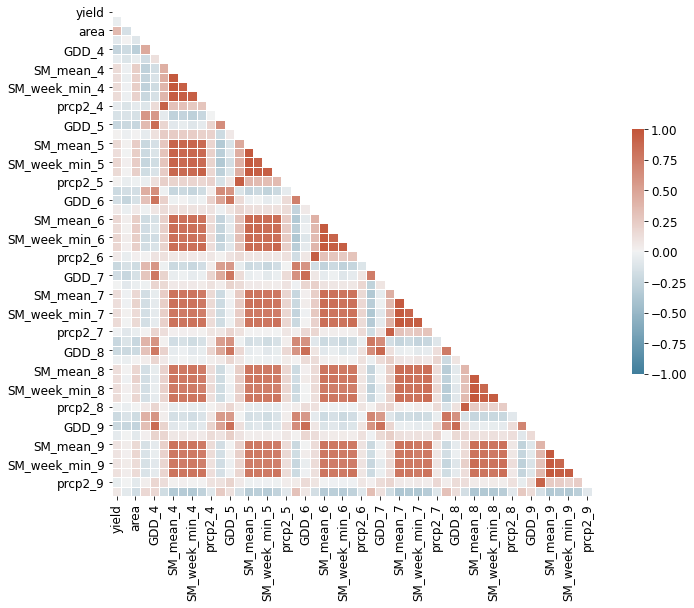

In [7]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.rcParams.update({'font.size': 12})
axis_font = {'size':'12'}
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

In [8]:
df['diff_'] = df['yield'].diff(1)

<AxesSubplot:xlabel='fips,year'>

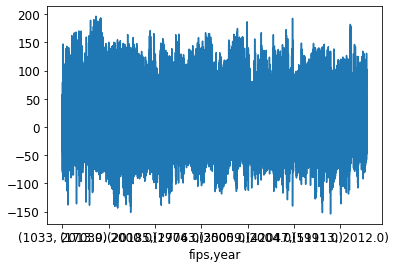

In [9]:
df.diff_.plot()